<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/project/07nov2021/TimeSeriesSplit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
!pip install yfinance
!pip install pandas-ta==0.2.45b

In [63]:
!pip install colorama

In [64]:
import yfinance as yf
import pandas_ta as ta
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,f1_score
import datetime as dt

from colorama import Fore, Back, Style
import seaborn as sns
import plotly.express as px
import matplotlib
from matplotlib.patches import Patch
from matplotlib import pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
plt.style.use('fivethirtyeight')
cmap_data = plt.cm.Paired
cmap_cv = plt.cm.coolwarm

In [65]:
def plot_cv_indices(cv, n_splits, X, y, date_col = None):
    """Create a sample plot for indices of a cross-validation object."""
    
    fig, ax = plt.subplots(1, 1, figsize = (11, 7))
    
    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0

        # Visualize the results
        ax.scatter(range(len(indices)), [ii + .5] * len(indices),
                   c=indices, marker='_', lw=10, cmap=cmap_cv,
                   vmin=-.2, vmax=1.2)


    # Formatting
    yticklabels = list(range(n_splits))
    
    if date_col is not None:
        tick_locations  = ax.get_xticks()
        tick_dates = [" "] + date_col.iloc[list(tick_locations[1:-1])].astype(str).tolist() + [" "]

        tick_locations_str = [str(int(i)) for i in tick_locations]
        new_labels = ['\n\n'.join(x) for x in zip(list(tick_locations_str), tick_dates) ]
        ax.set_xticks(tick_locations)
        ax.set_xticklabels(new_labels)
    
    ax.set(yticks=np.arange(n_splits+2) + .5, yticklabels=yticklabels,
           xlabel='Sample index', ylabel="CV iteration",
           ylim=[n_splits+0.2, -.2])
    ax.legend([Patch(color=cmap_cv(.8)), Patch(color=cmap_cv(.02))],
              ['Testing set', 'Training set'], loc=(1.02, .8))
    ax.set_title('{}'.format(type(cv).__name__), fontsize=15)
           


In [66]:
data_for_modeling=yf.download('^nsei',start='2015-01-01',parse_dates=['Date']).reset_index()

[*********************100%***********************]  1 of 1 completed


In [67]:
data_for_modeling['Date']=data_for_modeling['Date'].map(dt.datetime.toordinal)

In [68]:
data_for_modeling.ta.macd(append=True)
data_for_modeling.ta.vortex(append=True)
print()

In [69]:
#data_for_modeling.rename(columns={'date':'Date'},inplace=True)

In [70]:
features=data_for_modeling.columns.tolist()

In [71]:
features=[feats for feats in features if feats not in ['close','open','low','high']]

In [72]:
data_for_modeling['Signal']=data_for_modeling['close'].transform(lambda x : np.sign(x.diff(14)))


In [73]:
data_for_modeling=data_for_modeling.dropna()

In [74]:
X=data_for_modeling[features]
y=data_for_modeling['Signal']

In [75]:
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=5)

for fold, (train_index, test_index) in enumerate(tscv.split(X)):
    print("Fold: {}".format(fold))
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]


Fold: 0
TRAIN indices: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240

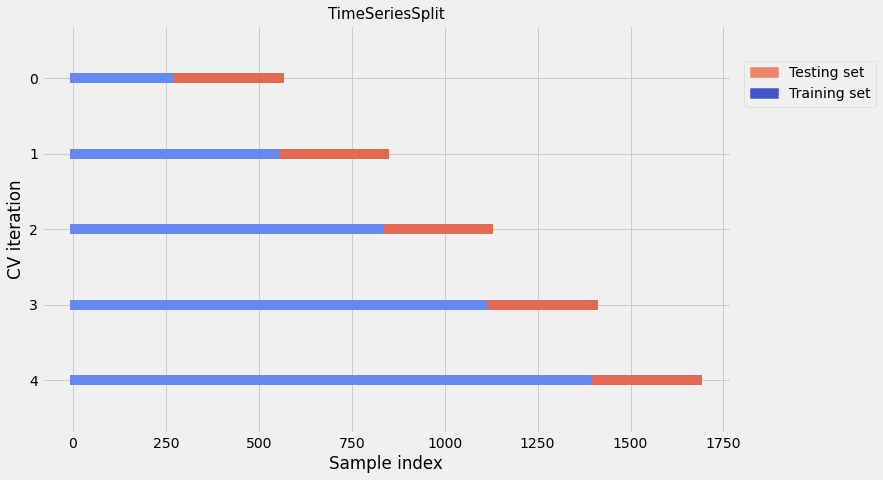

In [76]:
plot_cv_indices(tscv,5, X, y)

In [77]:

for train_index, test_index in tscv.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    print("Train Start: %d -> End %d" % (train_index[0], train_index[-1]))
    print("Test Start: %d -> End %d" % (test_index[0], test_index[-1]))
    print(X_train.shape, y_train.shape)
    print(X_test.shape, y_test.shape)
    print("#" * 50)

Train Start: 0 -> End 280
Test Start: 281 -> End 561
(281, 8) (281,)
(281, 8) (281,)
##################################################
Train Start: 0 -> End 561
Test Start: 562 -> End 842
(562, 8) (562,)
(281, 8) (281,)
##################################################
Train Start: 0 -> End 842
Test Start: 843 -> End 1123
(843, 8) (843,)
(281, 8) (281,)
##################################################
Train Start: 0 -> End 1123
Test Start: 1124 -> End 1404
(1124, 8) (1124,)
(281, 8) (281,)
##################################################
Train Start: 0 -> End 1404
Test Start: 1405 -> End 1685
(1405, 8) (1405,)
(281, 8) (281,)
##################################################


In [78]:
X_train.shape,X_test.shape

((1405, 8), (281, 8))

In [79]:
rf=RandomForestClassifier()

In [80]:
rand_frst_clf = RandomForestClassifier(n_estimators = 200,max_depth=20,min_samples_leaf=3,max_features = "auto",min_samples_split=40, criterion = "gini", bootstrap=True,random_state = 42)

In [81]:

# Fit the data to the model
rand_frst_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=3, min_samples_split=40,
                       n_estimators=200, random_state=42)

In [82]:
# Make predictions
y_pred = rand_frst_clf.predict(X_test)

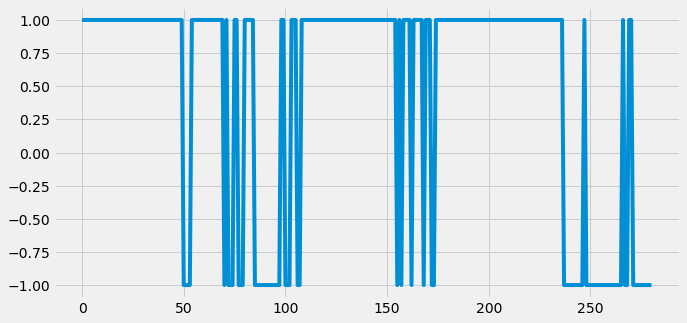

In [90]:
plt.figure(figsize=(10,5))
pd.Series(y_pred).plot();